In [ ]:
import pandas as pd
# Read data from the "fromage1.txt" file using pandas read_table function
# Set the separator to "\t" (tab), header to the first row (index 0), and use the first column as the index
fromage=pd.read_table(r"fromage1.txt",sep="\t",header=0,index_col=0)
# Print the descriptive statistics of the 'fromage' DataFrame
print(fromage.describe())

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

In [ ]:
fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


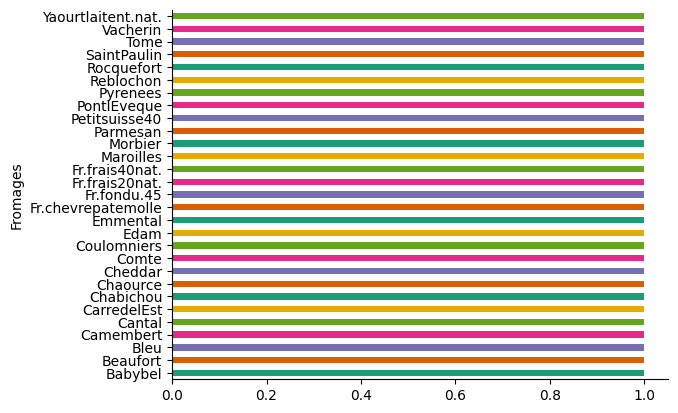

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Group the '_df_21' DataFrame by the 'Fromages' column and plot the count of each group in horizontal bar chart
fromage.groupby('Fromages').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# Remove the top and right spines from the plot for a cleaner appearance
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import numpy as np
from sklearn import cluster
# Set the random seed for reproducibility
np.random.seed(0)
# Create a KMeans clustering model with 5 clusters
kmeans = cluster.KMeans(n_clusters = 5)
# Fit the KMeans model to the 'fromage' data
kmeans.fit(fromage)
# Sort the indices based on the cluster labels and print the corresponding DataFrame
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))
# Print the transformed distances of each sample to the cluster centers
print(kmeans.transform(fromage))

             Fromages
0            Emmental
0            Beaufort
0            Vacherin
0             Cheddar
0               Comte
0                Edam
1           Reblochon
1            Pyrenees
1            Parmesan
1             Morbier
1           Maroilles
1         SaintPaulin
1              Cantal
1           Camembert
1                Bleu
1             Babybel
2      Fr.frais20nat.
2      Fr.frais40nat.
2       Petitsuisse40
2  Yaourtlaitent.nat.
3                Tome
3  Fr.chevrepatemolle
3            Chaource
3           Chabichou
3         PontlEveque
3         Coulomniers
4         CarredelEst
4          Rocquefort
4         Fr.fondu.45
[[298.50120835 184.40132646 384.27301005 144.19668281  78.00828304]
 [139.99964782  44.16198818 303.10311983 108.34460454 172.57012745]
 [ 38.57004091 179.08848428 349.91323389 223.82195305 319.72032918]
 [223.14028784  78.60472759 393.76898843 170.32549232 103.33609674]
 [234.87900727  98.30040285 332.43471728 147.16299354 135.59472294]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.50681355 0.37299771 0.31699678 0.35737616 0.32609984 0.28416085
 0.27393823 0.28357826 0.27660729]


<function matplotlib.pyplot.show(close=None, block=None)>

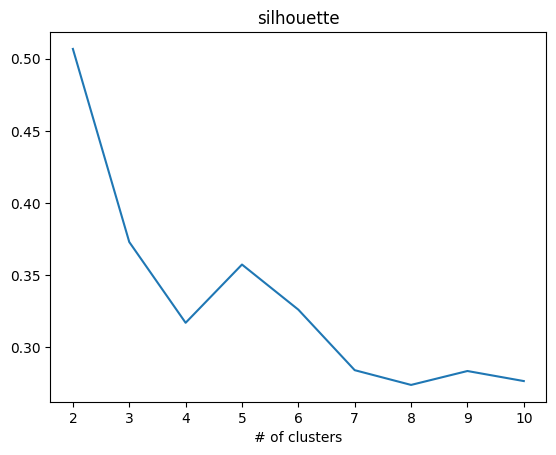

In [ ]:
from sklearn import metrics
# Create an array to store silhouette scores for different cluster numbers
res = np.arange(9, dtype ="double")
# Iterate over different numbers of clusters and calculate silhouette score for each
for k in np.arange(9):
 km = cluster.KMeans(n_clusters = k+2)
 km.fit(fromage)
 res[k] = metrics.silhouette_score(fromage,km.labels_)
print (res)
# Plot the silhouette scores against the number of clusters
import matplotlib.pyplot as plt
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show

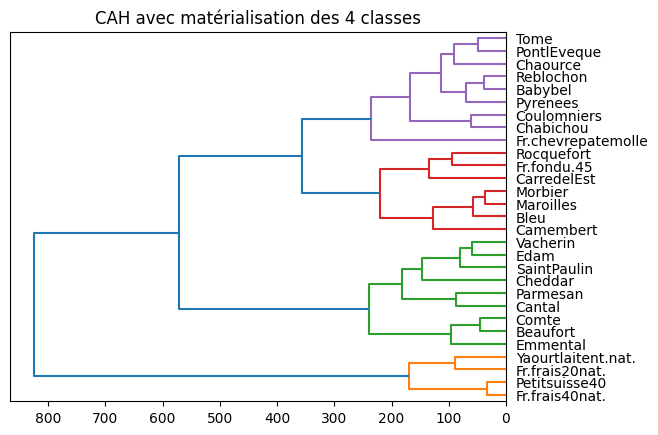

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [ ]:
import pandas
import numpy as np
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Create linkage matrix using Ward's method and Euclidean distance
Z = linkage(fromage,method='ward', metric='euclidean')
# Display the dendrogram
plt.title("CAH")
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=250)
plt.show()
# Assign observations to clusters using a distance threshold of 250
groupes_cah = fcluster(Z, t = 250,criterion='distance')
print(groupes_cah)
# Sorted indices of the groups
idg = np.argsort(groupes_cah)
# Display observations and their corresponding groups
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))

In [ ]:
# Create a cross-tabulation (contingency table) between CAH clusters and KMeans clusters
crosstab_result = pd.crosstab(
    groupes_cah,
    kmeans.labels_
)

# Display the result
print(crosstab_result)

col_0  0  1  2  3  4
row_0               
1      0  0  4  0  0
2      6  3  0  0  0
3      0  4  0  0  3
4      0  3  0  6  0


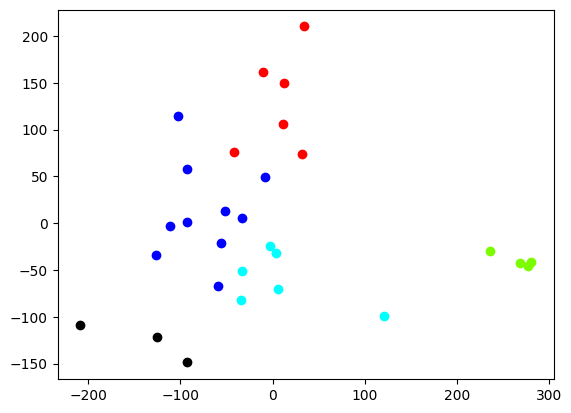

In [ ]:
from sklearn.decomposition import PCA
# Perform Principal Component Analysis (PCA) with 2 components
acp = PCA(n_components =2).fit_transform(fromage)
# Scatter plot the data points with different colors based on KMeans cluster labels
for couleur,k in zip(['red','blue','lawngreen', 'aqua','black'],[0,1,2,3,4]):
 plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
# Show the plot
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

n_clusters_cah = 4  # Choisissez le nombre de clusters souhaité
cah_model = AgglomerativeClustering(n_clusters=n_clusters_cah, linkage='ward')
labels_cah = cah_model.fit_predict(fromage)

# Afficher les résultats
result_cah = pd.DataFrame(fromage.index, labels_cah, columns=['Fromages'])
result_cah = result_cah.sort_index()
print(result_cah)

             Fromages
0         SaintPaulin
0            Beaufort
0            Parmesan
0              Cantal
0             Cheddar
0               Comte
0            Vacherin
0                Edam
0            Emmental
1         CarredelEst
1          Rocquefort
1             Morbier
1           Maroilles
1         Fr.fondu.45
1           Camembert
1                Bleu
2         Coulomniers
2            Chaource
2           Chabichou
2         PontlEveque
2            Pyrenees
2           Reblochon
2             Babybel
2                Tome
2  Fr.chevrepatemolle
3      Fr.frais20nat.
3      Fr.frais40nat.
3       Petitsuisse40
3  Yaourtlaitent.nat.


In [ ]:
# Create a cross-tabulation (contingency table) between CAH clusters and KMeans clusters
crosstab_result = pd.crosstab(
    labels_cah,
    groupes_cah
)

# Display the result
print(crosstab_result)

col_0  1  2  3  4
row_0            
0      0  9  0  0
1      0  0  7  0
2      0  0  0  9
3      4  0  0  0


In [ ]:
crosstab_result = pd.crosstab(
    labels_cah,
    kmeans.labels_
)

# Display the result
print(crosstab_result)

col_0  0  1  2  3  4
row_0               
0      6  3  0  0  0
1      0  4  0  0  3
2      0  3  0  6  0
3      0  0  4  0  0


In [ ]:
from scipy.spatial.distance import pdist, squareform

def calculate_diameter(fromage, cluster):
    distance_matrix = squareform(pdist(fromage.iloc[cluster], 'euclidean'))
    return np.max(distance_matrix)

def find_cluster_to_split(clusters, fromage):
    max_diameter = float('-inf')
    cluster_to_split = None

    for cluster in clusters:
        diameter = calculate_diameter(fromage, cluster)
        if diameter > max_diameter:
            max_diameter = diameter
            cluster_to_split = cluster

    return cluster_to_split

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

def divisive_kmeans_clustering(data, k, max_clusters=fromage.shape[0]):
    clusters = [list(range(len(data)))]
    linkage_matrix = []

    while any(len(group) > 1 for group in clusters):
        cluster_to_split = find_cluster_to_split(clusters, data)

        kmeans = KMeans(n_clusters=k)
        cluster_assignments = kmeans.fit_predict(data.iloc[cluster_to_split])
        sub_clusters = [np.array(cluster_to_split)[cluster_assignments == i].tolist() for i in range(k)]

        # Store linkage information for hierarchical clustering
        parent_cluster_idx = clusters.index(cluster_to_split)
        for i, sub_cluster in enumerate(sub_clusters):
            child_cluster_idx = len(clusters) + i
            linkage_matrix.append([parent_cluster_idx, child_cluster_idx, calculate_diameter(data, sub_cluster)])

        clusters.remove(cluster_to_split)
        clusters.extend(sub_clusters)
        if len(clusters) == max_clusters:
            break

    # Create dendrogram
    dendrogram(linkage(linkage_matrix))
    plt.show()

    return clusters





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


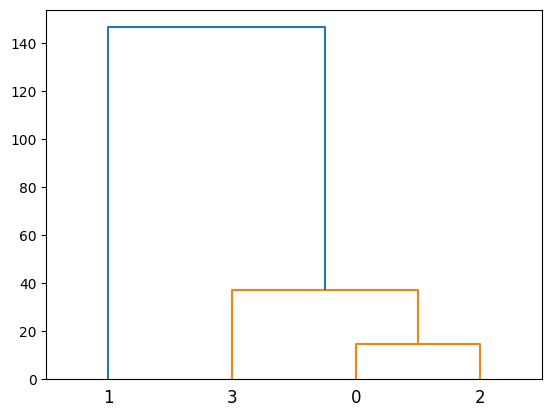

Cluster 1: Fr.chevrepatemolle, Fr.frais20nat., Fr.frais40nat., Petitsuisse40, Yaourtlaitent.nat.
Cluster 2: CarredelEst, Babybel, Bleu, Camembert, Chabichou, Chaource, Coulomniers, Fr.fondu.45, Maroilles, Morbier, PontlEveque, Pyrenees, Reblochon, Rocquefort, Tome
Cluster 3: Beaufort, Cantal, Cheddar, Comte, Edam, Emmental, Parmesan, SaintPaulin, Vacherin


In [ ]:
resulting_clusters = divisive_kmeans_clustering(fromage, 2,3)

# Map cluster IDs to cheese names
cluster_mapping = {}
for i, cluster in enumerate(resulting_clusters):
    cluster_mapping[f"Cluster {i + 1}"] = fromage.index[cluster].tolist()

# Print the resulting clusters with cheese names
for cluster_id, cheeses in cluster_mapping.items():
    print(f"{cluster_id}: {', '.join(cheeses)}")


In [ ]:

def calculate_average_distance(fromage, cluster, i):
    distance_matrix = squareform(pdist(fromage.iloc[cluster], 'euclidean'))
    if len(cluster) > 1:
        return np.linalg.norm(distance_matrix[i, :]) / (len(cluster) - 1)
    else:
        return 0.0

def compute_dx(fromage, Ci, Cj):
    dx_values = []
    for i, x in enumerate(Ci):
        avg_distance_x_Ci = calculate_average_distance(fromage, Ci, i)

        avg_distance_x_Cj = calculate_average_distance(fromage, [x] + Cj, 0)

        dx = avg_distance_x_Ci - avg_distance_x_Cj
        dx_values.append(dx)
    return dx_values

def split_cluster(fromage, cluster):
    Ci = cluster
    Cj = []

    while True:
        dx_values = compute_dx(fromage, Ci, Cj)
        if not dx_values:
            break

        max_dx_index = np.argmax(dx_values)
        max_dx_value = dx_values[max_dx_index]

        if max_dx_value <= 0:
            break

        x_to_move = Ci[max_dx_index]
        Ci.remove(x_to_move)
        Cj.append(x_to_move)

    return Ci, Cj


In [ ]:
def divisive_distance_clustering(fromage, max_clusters=fromage.shape[0]):
    clusters = [list(range(len(fromage)))]

    while any(len(cluster) > 1 for cluster in clusters):
        print("cluster :",clusters)
        cluster_to_split = find_cluster_with_max_diameter(clusters,fromage)
        print(cluster_to_split)
        Ci, Cj = split_cluster(fromage, cluster_to_split)
        clusters.remove(cluster_to_split)

        if Ci:
            clusters.append(Ci)
        if Cj:
            clusters.append(Cj)
        if(len(clusters)==max_clusters):
          break
    return clusters

In [ ]:
resulting_clusters = divisive_distance_clustering(fromage, 4)

# Map cluster IDs to cheese names
cluster_mapping = {}
for i, cluster in enumerate(resulting_clusters):
    cluster_mapping[f"Cluster {i + 1}"] = fromage.index[cluster].tolist()

# Print the resulting clusters with cheese names
for cluster_id, cheeses in cluster_mapping.items():
    print(f"{cluster_id}: {', '.join(cheeses)}")


cluster : [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
cluster : [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], [15]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
cluster : [[15], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], [16, 20]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28]
cluster : [[15], [16, 20], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27], [28]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27]
cluster : [[15], [16, 20], [28], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 18, 19, 21, 22, 23, 24, 25, 26, 